# Data Science Principles and Practices
### Mehul Singh (6678794)

In [200]:
# Importing libraries
import scipy.stats
import numpy as np
import statsmodels.api as sm
from statsmodels.api import Poisson
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Task 1

In [198]:
# Importing the dataset
QD_sent_len = pd.read_csv('QuietDonSentenceLengths.csv', header = None)
QD_sent_len = QD_sent_len[0].values.tolist()

<b> The QuietDonSentenceLength.csv is a comma seperated file that consists of one column which contains the length of sentences in the book.

In [141]:
print(np.mean(QD_sent_len))

12.67313829787234


The mean of the data is found to be 12.67.

## Poisson Distribution

The poisson distribution models the events that occur within a certain period of time. E(x) which is the expected number of events that is anticipated to remain constatnt throughout the modeling. The formula for poisson distribution is given as : 

p(x;$\lambda$ )= $\lambda {^x}*e{^-\lambda}$/x!

x = observed data point

$\lambda$ = E(x) = expected number of events

In [155]:
x = np.ones_like(QD_sent_len)
result_poisson = sm.Poisson(QD_sent_len,x).fit()
print(result_poisson.summary())

Optimization terminated successfully.
         Current function value: 4.947456
         Iterations 1
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                 3760
Model:                        Poisson   Df Residuals:                     3759
Method:                           MLE   Df Model:                            0
Date:                Wed, 02 Jun 2021   Pseudo R-squ.:                   0.000
Time:                        04:04:23   Log-Likelihood:                -18602.
converged:                       True   LL-Null:                       -18602.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5395      0.005    554.347      0.000       2.531       2.548


## MLE (Poisson distribution)

Maximum Likelihood Estimation estimates the values of parameters of a model that produces a curve that best fits the data. It aims to find parameters that maiximises the value of the likelihood function. The likelihood function is of observations for a random sample size n :

$ L(\theta) = f(x_1;\theta)*...*f(x_n;\theta)$

Since Poisson distribution is governed by only parameter $\mu$, which is both mean and variance.

$ L(\mu|x) =  p(x|\mu)$

$ L(\mu|x) $ is the likelihood function, the value of which is to be maximised.

$p(x|\mu)$ is the probability density of the observed data based on the value of mean.

In [123]:
from scipy.stats import poisson
def Log_likelihood_pd(mean):
    loglikelihood = np.sum(poisson.logpmf(QD_sent_len,mean,loc=0))
    return -loglikelihood

The Log_likelihood_pd function evaluates the product of the distinct probilities in log form. To find the best estimate of the parameter (mean), the likelihood function is maximized. In order to maximize the likelihood, we need to minimize the loglikelihood. This is done using the minimize function from the scipy library.

In [128]:
from scipy.optimize import minimize
minimize(Log_likelihood_pd,4)
print(minimize(Log_likelihood_pd,4).x)

[12.67313734]


From the above calculations, we found that the average length of the sentences in the book is 12.67.

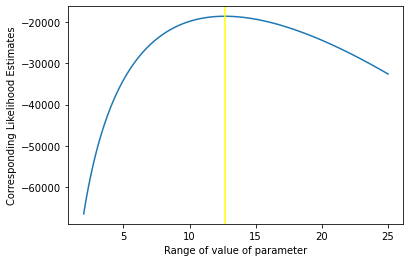

In [135]:
import matplotlib.pyplot as plt

a = np.linspace(2,25,1000) 

b = [] # empty list
for mean in a: # for each value of mean in a
    b.append(-Log_likelihood_pd(mean)) # add Log_likelihood_pd(mean) to the empty list

plt.plot(a,b) # plot the negative log likelihood
plt.axvline(12.67314125,color='yellow') 
plt.xlabel("Range of value of parameter")
plt.ylabel("Corresponding Likelihood Estimates")
plt.show()

The above graph depicts the variation of likelihood with the mean value of parameter. The range of mean values are chosen arbitrarily from 2 to 25. The yellow line is for the mean value of 12.673 which corresponds to the maximum likelihood estimate.

## Negative Binomial Distribution

A negative binomial distribution models the number of outcomes in identical and independent distributed events until r successes are observed. It is governed by two parameters, namely, mean and shape parameter. The formula for negative binomial probability is given as :

b(x;r;p) = $ C_{r-1}^{x-1} * p^r * (1-p)^{x-r} $

where , 

x =  number of trials

r = number of successes

p = probability of success of a trial

b = negative binomial probability

In [156]:
from statsmodels.discrete.discrete_model import NegativeBinomial
x = np.ones_like(QD_sent_len)
result_negativebinomial = sm.NegativeBinomial(QD_sent_len, x).fit()
print(result_negativebinomial.summary())
print(result_negativebinomial.params)

Optimization terminated successfully.
         Current function value: 3.417881
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                 3760
Model:               NegativeBinomial   Df Residuals:                     3759
Method:                           MLE   Df Model:                            0
Date:                Wed, 02 Jun 2021   Pseudo R-squ.:              -1.942e-12
Time:                        04:04:56   Log-Likelihood:                -12851.
converged:                       True   LL-Null:                       -12851.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5395      0.011    230.9

The alpha and beta coefficients values are 0.375 and 2.539 respectively for the negative binomial distribution.

The alpha value represents the dispersion parameter's estimate. The model is reduced to simplified poisson model when the dispersion value equals to zero. The data is over dispersed if the alpha value is significantly greater than zero. In such a case a negative binomial model is preferred over poisson model for esimation.


In [140]:
print(" Mean :", np.exp(result_negativebinomial.params[0]))

 Log Likelihood : 12851.231565816006
 Mean : 12.673138297872342


The average expected length of sentences  is found to be 12.67 from maximum likelihood estimation of negative binomial distribution.

In [157]:
# Maximum likelihood estimation in negative binomial 
from scipy.stats import nbinom
alpha = result_negativebinomial.params[1]
def Log_likelihood_nb(mean):
    r = 1/alpha
    p = r/(r+mean)
    loglikelihood = (nbinom.logpmf(QD_sent_len, r, p))
    return -np.sum(loglikelihood)

Negative Binomial takes two parameter, namely, r and p where r is the number of successes to be achieved and p is the probability of success of one trial. The mean is estimated assuming alpha value.

The Log_likelihood_nb function evaluates the product of the distinct probilities in log form. To find the best estimate of the parameter (mean), the likelhood function is maximized. In order to maximise the likelihood, we need to minimise the loglikelihood. This is done using the minimize function from the scipy library.

In [158]:
from scipy.optimize import minimize
print(minimize(Log_likelihood_nb,3).x)

[12.67313664]


From the above negative binomial regression calculations, we found that the average length of the sentences in the book is 12.67. Here, the parameter value does not change the estimate as the minimize function provides the best estimate.

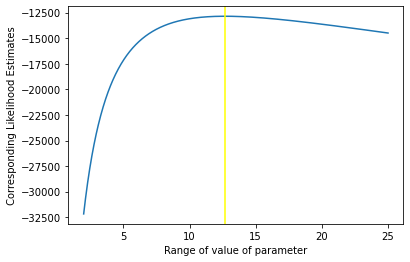

In [159]:
import matplotlib.pyplot as plt

a = np.linspace(2,25,1000) 

b = [] # empty list
for mean in a: 
    b.append(-Log_likelihood_nb(mean)) # add Log_likelihood_nb(mean) to empty list
plt.plot(a,b) # plotting line for negative log likelihood
plt.axvline(12.67313603,color='yellow') 
plt.ylabel(" Corresponding Likelihood Estimates ")
plt.xlabel("Range of value of parameter")
plt.show()

The above graph depicts the variation of likelihood with the mean value of parameter. The range of mean values are chosen arbitrarily from 2 to 25. The yellow line is for the mean value of 12.673 which corresponds to the maximum likelihood estimate.

In [199]:
print("Negative Binomial distribution AIC:",result_negativebinomial.aic)
print("Poisson distribution AIC:",result_poisson.aic)

Negative Binomial distribution AIC: 25706.463131632012
Poisson distribution AIC: 37206.86706437265


The above AIC scores conclude that negative binomial distribution is the better fit for the dataset in comparison to Poisson distribution.

## Maximum a posteriori inference

MAP inference aims to find the parameter values that maximizes teh posterior distribution. It produces single value estimates similar to MLE. <b> But MAP tries to maximize the posterior ditribution while MLE tries to maximize the likelihood function.<b> 
    
    The posterior probability is given as :
 
$p(\theta|x) \propto  p(x|\theta) * p(\theta)$
    
    where,
    
$p(\theta|x) $ is the posterior probability   
    
$p(x|\theta)$ is the likelihood
    
$p(\theta)$ is prior distribution

If the prior distribution is unifor (flat) than, MLE is equivalent to MAP.
Posterior probability represnts our belief about the parameter values taking some evidence (some observed data) into account.

In [180]:
from scipy.stats import gamma
def max_post_poisson(mean):
    loglikelihood_p = np.sum(poisson.logpmf(QD_sent_len,mean,loc=0))
    prior_p = gamma.logpdf(mean,3,loc=0.1,scale=0.1)
    return -(loglikelihood_p+prior_p)


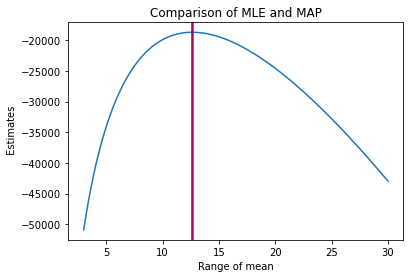

In [186]:
a = np.linspace(3,30,1000) 
# data length = 3 to 30.

b = [] # empty list 
for mean in a: # for each value of mu in the range
    b.append(-max_post(mean)) # append to the empty list

plt.plot(a,b) # plot negative log likelihood

poisson_map = minimize(max_post_poisson,3).x
poisson_mle = minimize (Log_likelihood_pd,3).x
plt.axvline(poisson_mle,color='red') 
plt.axvline(poisson_map,color='purple')
plt.xlabel('Range of mean')
plt.ylabel(' Estimates')
plt.title('Comparison of MLE and MAP')
plt.show()

The purple line represents the MAP estimate while the red line represents the maximum likelihood estimate. Both estimate are situated around the mean value (12.67) which concludes that the expected average length of sentences is around 12.7 in the 'Quiet Flows the Don'.

# TASK 2

The ATLAS-data.csv contains 29 features for 10000 events which are represented by columns and rows respectively.

In [197]:
Atlas_data = pd.read_csv('ATLAS-data.csv',header = None,delimiter=',')
print(Atlas_data.head())

        0       1        2        3      4        5      6      7       8   \
0  243.128  96.455  158.618   90.253  0.693   56.238  1.581  3.615  13.597   
1  139.751  74.028  111.619   44.266  2.119  104.723 -0.498  2.533   9.437   
2  116.217  73.136   59.239  101.850  0.625   85.539  2.979  1.922  28.049   
3   64.544   0.099   28.945  341.418  2.390  358.936 -1.181  0.714  35.293   
4   32.281  67.393   26.006   29.088  1.330  108.191 -0.362  0.846  48.389   

        9   ...       19     20       21       22     23     24      25  \
0  264.586  ...   72.877  2.121  376.410   46.248 -0.958 -0.444  42.759   
1  168.638  ...   20.147  0.447  252.698   36.798  0.269 -1.254  31.816   
2  202.636  ...   68.144  1.816  271.485   82.453  2.066 -1.210  58.216   
3  508.349  ...  243.099 -2.409  470.806  331.152 -1.693  0.615  41.742   
4  152.087  ...   32.186 -1.421  244.220   48.198  0.949  1.517  40.382   

      26     27       28  
0 -1.651 -1.445  157.638  
1 -1.849  0.664   68.614  

The Atlas-labels.csv contains the label for each event in Atlas-data.csv, in the same order. Label 0 corresponds to background events and label 1 to signal.

In [193]:
Atlas_labels = pd.read_csv('ATLAS-labels.csv',header = None,delimiter=',')
print(Atlas_labels[0].value_counts())

0    5312
1    4688
Name: 0, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


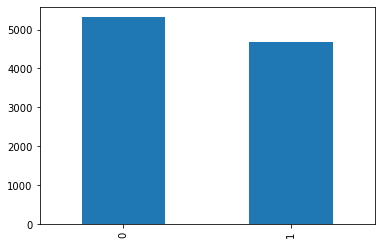

In [194]:
# The bar plot for the output label shows that the dataset is balanced.
print(Atlas_labels[0].value_counts().plot.bar())

In [11]:
# Scaling converts the input data so that the data has a mean value of zero and standard deviation value of 1.
# Scaling makes the unitless and is done to get better performance from the model.
from sklearn.preprocessing import scale
Atlas_scaled_data = scale(Atlas_data)
Atlas_scaled_data = pd.DataFrame(Atlas_scaled_data)

In [87]:
# Splitting the data into train and test data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Atlas_scaled_data,Atlas_labels,test_size=0.3,stratify=Atlas_labels)

# Naive Bayes Classification
    
<b>   Naive Bayes classifier is a probabilistic machine learning model that is based on Bayes theorem and is utilised to perform classification. It predicts the probablity of a class using the given value of features. The probability is predicted using Bayes rule.
   
$ p(c_{k}|x_{i}) \propto p(x_{i}|c_{k})p(c_{k}) $
    where, 
    
    
$p(c_{k})$ = Prior probability 

$p(x_{i}|c_{k})$ = Likelihood gives the probability of a data point assuming that it belongs to class k.

$ p(c_{k}|x_{i})$ = Posterior probaility
    
The prior probability represents our belief about the data before any evidence is taken into acount. It gives the probability of data point belonging to a particular class k. The liklihood probaility provides the likelihood do a data point assuming that it belongs to class k. Finally, the posterior probability is calculated using the prior updated with likelihood. It is basically the probability of a data point belonging to class k when some evidence is taken into account.
    
Naive Bayes also assumes that the data follows normal gaussian distribution and all input features are independent of each other.

In [88]:
# Libraries required for Naive Bayes model.
import sklearn
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

In [195]:
#Training the Naive Bayes model
naive_bayes_classifier = GaussianNB()
print(naive_bayes_classifier.fit(x_train,y_train[0]))

GaussianNB()


In [90]:
# Prediction of Naive Bayes Model
naive_bayes_predictions = naive_bayes_classifier.predict(x_test)

## Confusion Matrix

 A confusion matrix is plotted to evaluate the performance of the model. It consists of True positive, True negative, False positive and, False negative and is used to calculate precision and accuracy along with some more metrics.

In [91]:
from sklearn import metrics
confusion_matrix_nb = metrics.confusion_matrix(y_test, naive_bayes_predictions)

In [92]:
# Libraries to plot Confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

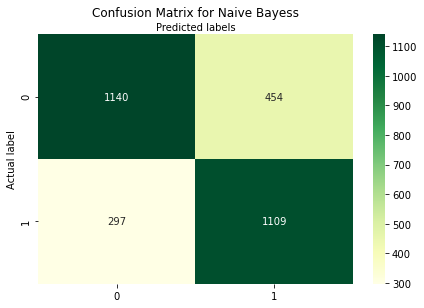

In [187]:
# Plotting Confusion Matrix
class_names=[0,1] # classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_nb), annot=True, cmap="YlGn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Naive Bayess', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted labels')
plt.show()

The values in the confusion matrix shows that the classifier performs fairly well. The confusion matrix for logistic regression shows that the model misclassified more number of labels 1 in comparison to label 0.

### Evaluation metrics

The following metrics were used to evaluate the model : 

In [113]:
print(classification_report(y_test,naive_bayes_predictions))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1594
           1       0.71      0.79      0.75      1406

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



In [114]:
print("Accuracy for Naive Bayes model:",metrics.accuracy_score(y_test, naive_bayes_predictions))
print("Precision for Naive Bayes model:",metrics.precision_score(y_test, naive_bayes_predictions))
print("Recall for Naive Bayes model:",metrics.recall_score(y_test, naive_bayes_predictions))
print("F1 score for Naive Bayes model:",metrics.f1_score(y_test, naive_bayes_predictions))

Accuracy for Naive Bayes model: 0.7496666666666667
Precision for Naive Bayes model: 0.7095329494561741
Recall for Naive Bayes model: 0.7887624466571835
F1 score for Naive Bayes model: 0.7470528797574942


 Accuracy is the ratio of True positives to the total number events observed. Mathematically, it is given as : (TP+TN)/(TP+FP+FN+TN)
    
 Precision gives information about what proportion of predicted labels were correctly classified. Mathematically given as : (TP)/(TP+FP)
       
 Recall provides information about what proportion of actual positives were correctly classified. Mathematically, it is given as : (TP)/(TP+FN)
 
### ROC Curve

The receiver operating characteristic curve plots the true positive rate versus false positive rate and is a common metric for comparison of classification models.

In [96]:
#Plotting the ROC curve.
from sklearn import metrics
# calculate roc curve
fpr_naive_bayes, tpr_naive_bayes, threshold = metrics.roc_curve(y_test, naive_bayes_predictions)
roc_auc_nb = metrics.auc(fpr_naive_bayes, tpr_naive_bayes)

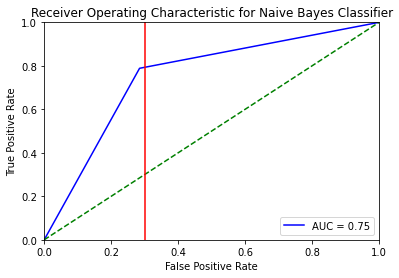

In [97]:
plt.title('Receiver Operating Characteristic for Naive Bayes Classifier')
plt.plot(fpr_naive_bayes, tpr_naive_bayes, 'b', label = 'AUC = %0.2f' % roc_auc_nb)
plt.legend(loc = 'lower right')
#No skill classifier
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.axvline(x=0.3,color="red")
plt.show()

In the above plot, the green line represents the no-skill classifier. A no-skill classifier is unable to distinguish between classes and predicts a constant or random class for each event. It is generally represented by a diagonal line in the ROC plot. The blue line represents the ROC curve for Naive Bayes model and the red line shows the optimum value of true positive rate. Additionally, AUC value is also given. AUC stands for area under the ROC curve and is a two dimensional measurment of the area beneath the ROC curve.

## K Fold Cross Validation

K Fold Cross Validation is a method in which the dataset is divided into k sets or folds where in each iteration, a new fold is used as testing data while the other folds are used as training data. The model accuracy is the average of the accuracy obtained in each iteration. 

In [110]:
from sklearn import model_selection

KFold_CV_nb=model_selection.KFold(shuffle=True,n_splits=5,random_state=7)
KFold_CV_Accuracy_nb=model_selection.cross_val_score(naive_bayes_classifier,Atlas_data,Atlas_labels[0],cv=5,scoring="accuracy")
print("Model accuracy obtained in Naive Bayes is: ", KFold_CV_Accuracy_nb.mean())
print("Model variance : %.3f"%np.std(KFold_CV_Accuracy_nb))

Model accuracy obtained in Naive Bayes is:  0.7472
Model variance : 0.005


# Logistic Regression Classification

<b>  Logistic Regression is a classification algorithm which uses a logistic function to predict the output categorical variable. The logistic function used is the sigmoid function which is given as : 
$ S(x) =1 / (1 + e^{-x})$

The output for logistic regression is given as: 
$ Y = \beta_0+\beta_1*x_1+\beta_2*x_2+...+\beta_n*x_n$   
    
    where, 
$ x_0, x_1 .... x_n $ are input features
    
$ \beta_0, \beta_1 ... \beta_n$ are coefficients
    
Loistic Regression model can be expressed as : 
    
$ logit(p_x) = log(p_x/(1-p_x) = \beta_0 + \beta_1x$ 
 
The assumptions made in logistic regression are : 

* Little or zero multilinearity among the input variables.
* Input variables are linearly coupled with the log of odds.
* Usually requires a large data sample to perform.
    

In [196]:
# Training the logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
print(logistic_regression.fit(x_train,y_train[0]))

LogisticRegression()


In [101]:
# Predictions of the model
predictions_logistic_regression = logistic_regression.predict(x_test)

## Confusion Matrix

In [102]:
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
confusion_matrix_lr = metrics.confusion_matrix(y_test, predictions_logistic_regression)

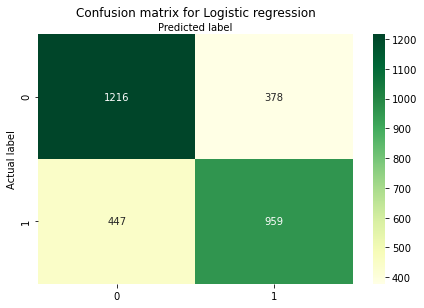

In [188]:
# Plotting the confusion matrix 
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_lr), annot=True, cmap="YlGn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The confusion matrix for logistic regression shows that the model misclassified more number of labels 1 in comparison to label 0. Also, the total number of misclassification is higher as compared to Naive Bayes model.

## Evaluation metrics

In [104]:
print(classification_report(y_test,predictions_logistic_regression))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1594
           1       0.72      0.68      0.70      1406

    accuracy                           0.73      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.72      0.72      0.72      3000



In [111]:
print("Accuracy for Logistic regression model:",metrics.accuracy_score(y_test, predictions_logistic_regression))
print("Precision for Logistic regression model:",metrics.precision_score(y_test, predictions_logistic_regression))
print("Recall for Logistic regression model:",metrics.recall_score(y_test, predictions_logistic_regression))
print("F1 score for Logistic regression model:",metrics.f1_score(y_test, predictions_logistic_regression))

Accuracy for Logistic regression model: 0.725
Precision for Logistic regression model: 0.7172774869109948
Recall for Logistic regression model: 0.682076813655761
F1 score for Logistic regression model: 0.6992344148742253


## ROC curve 

In [106]:
#Plotting the ROC curve.
from sklearn import metrics
# calculate roc curve
fpr_logistic_regression, tpr_logistic_regression, threshold = metrics.roc_curve(y_test, predictions_logistic_regression)
roc_auc_lr = metrics.auc(fpr_logistic_regression, tpr_logistic_regression)

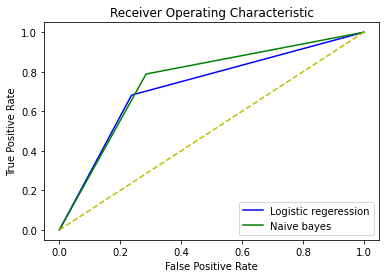

AUC Logistic regeression : 0.72


In [107]:
plt.title('Receiver Operating Characteristic')
#Roc curve for Logistic regeression 
plt.plot(fpr_logistic_regression, tpr_logistic_regression, 'b', label = "Logistic regeression")
#Roc curve for Naive Bayes Model
plt.plot(fpr_naive_bayes, tpr_naive_bayes,color='green',label='Naive bayes')
#AUC for Naive bayes model
plt.legend(loc = 'lower right')
#No skill classifier
plt.plot([0, 1], [0, 1],'y--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Calculating are under the curve for logistic regression
print("AUC Logistic regeression : %.2f"%roc_auc_lr)

## K fold Cross Validation for Logistic Regression

In [201]:
K_Fold_cv_lr=model_selection.KFold(shuffle=True,n_splits=5,random_state=7)
K_Fold_cv_lr_acc=model_selection.cross_val_score(logistic_regression,Atlas_data,Atlas_labels[0],cv=5,scoring="accuracy")
print(K_Fold_cv_lr_acc)

[0.714  0.6985 0.7015 0.7015 0.692 ]


In [109]:
print("Average Accuracy Logistic Regression model ", K_Fold_cv_lr_acc.mean())
print("Model variance is %.3f"%np.std(K_Fold_cv_lr_acc))

Average Accuracy Logistic Regression model  0.7015
The model variance is 0.007


# Conclusions 

    
<b>    
* The accuracy for Naive Bayes classifier and Logistic Regression classifier is 74.9% and 72.5% respectively. Although the performance of both models is alike, Naive Bayes classifer performed marginally better.

* The precision for Naive Bayes model is 0.709 which is almost equal to the precision value of 0.717 for logistic regression model. 
    
* The recall value of naive bayes model (0.788) is higher than that of logistic regression model (0.682).
    
* The F1 score of naive bayes model (0.747) is higher than the F1 score of logistic regression model (0.699).
    
* The average accuracy after applying K-fold cross validation is also better for naive bayes model.
    
* The AUC value for naive bayes (0.75) si better than the AUC value of logistic regression model (0.72).
    
* The model variance for naive bayes model (0.005) is lower than the model variance for logistic regression (0.007)
    
From the above assessment, we can conclude that the Naive Bayes classifier is the optimum model for classifiction.